# K-Means #
## 1. Introduction ##
The K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.



## 2. The basic idea ##
Supposed that you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

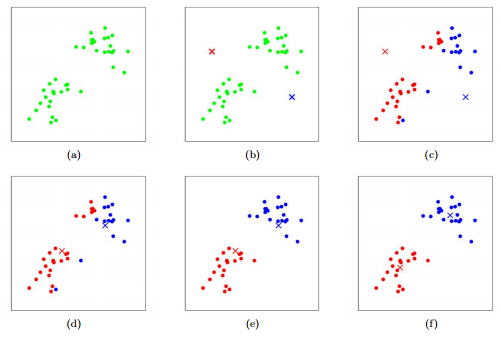

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [14]:
data = pd.read_csv('Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Step 1 Finding continous Feature to do the clustering ##


In [15]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [18]:
feature_used =['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

data_used = data[feature_used]
data_used.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


(array([379.,  45.,  12.,   1.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([2.50000e+01, 6.10940e+03, 1.21938e+04, 1.82782e+04, 2.43626e+04,
        3.04470e+04, 3.65314e+04, 4.26158e+04, 4.87002e+04, 5.47846e+04,
        6.08690e+04]),
 <BarContainer object of 10 artists>)

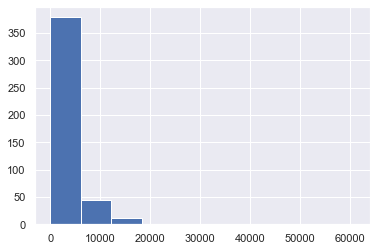

In [19]:
plt.hist(data_used['Frozen'])

array([[<AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>]], dtype=object)

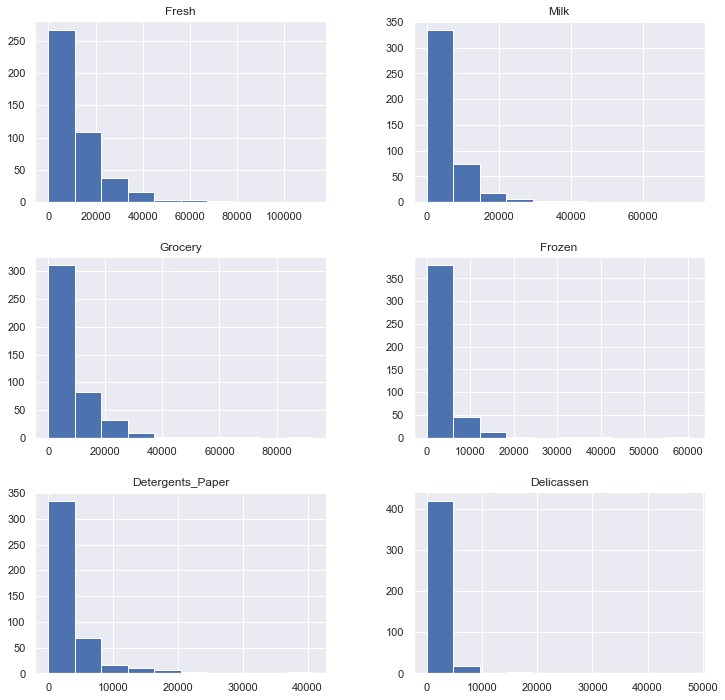

In [20]:
rcParams['figure.figsize'] = 12, 12
data_used[feature_used].hist()

#### Variable check completed. No constant variable ####

## Step 2 Standardlized data ##

In [21]:
data_std = StandardScaler().fit_transform(data)
data_std


array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## Step 3 we process the K-mean Model ##


In [22]:
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(data_std)
model.cluster_centers_

array([[-6.90297086e-01,  5.90668285e-01, -3.29004038e-01,
        -3.87669084e-01, -4.69167693e-01, -2.64497650e-01,
        -4.34100513e-01, -1.88335360e-01],
       [ 1.44865163e+00, -5.22752861e-01, -4.93453277e-01,
         1.35983425e+00,  1.75077690e+00, -2.81060196e-01,
         1.84689809e+00,  3.43035394e-01],
       [-5.58263215e-01, -1.66011855e+00, -1.27687964e-01,
        -3.27150312e-01, -4.00147060e-01, -8.85084532e-02,
        -4.05262657e-01, -1.59024801e-01],
       [-5.60663831e-01,  3.16394455e-01,  2.25534852e+00,
        -3.01509060e-01, -3.30716287e-01,  2.58965848e-01,
        -4.63789359e-01,  1.55729733e-01],
       [-6.90297086e-01,  5.90668285e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01],
       [ 1.44865163e+00,  4.23828904e-01, -2.75826500e-01,
         2.34503387e-01,  3.80996041e-01, -3.52447411e-01,
         3.98858931e-01, -3.69809188e-02],
       [-6.90297086e-01,  5.906682

In [23]:
n_obs = np.shape(data_std)[0]
n_obs

440

## Step 4 Calculating the mean square error to find the optimal K ##

In [26]:
from sklearn.metrics import mean_squared_error

    

ks=[i for i in range(3,10)]
msess=[]

for k in ks:
    print( 'clustering with',k,'centers')
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data_std)
    centers= model.cluster_centers_
    mses=[]
    for c in centers:
        #c_mat = np.repeat(c, n_obs, axis=0)
        mse= (np.square(data_std - c)).mean()
        mses.append(mse)
    msess.append(sum(mses)/len(centers))
        


clustering with 3 centers
clustering with 4 centers
clustering with 5 centers
clustering with 6 centers
clustering with 7 centers
clustering with 8 centers
clustering with 9 centers


## Plot it ##

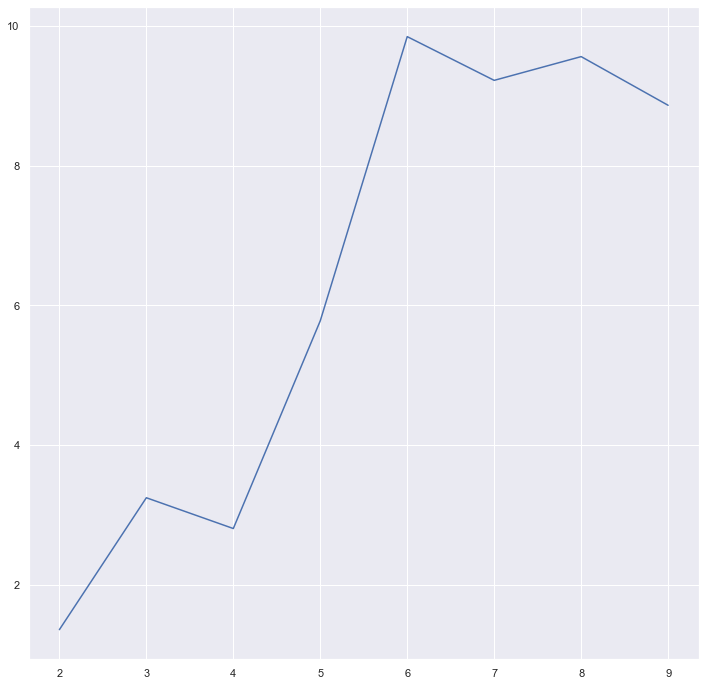

In [25]:

plt.plot(ks,msess)

### We can eaisly find that k=2 is the samllest. So, we take k=2 ###

In [27]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(data_std)
model.cluster_centers_

array([[ 1.43292407,  0.11529873, -0.27641856,  0.75169392,  0.94422034,
        -0.27827435,  0.97905944,  0.20336194],
       [-0.64104498, -0.05158101,  0.12366094, -0.33628412, -0.42241436,
         0.12449116, -0.43800028, -0.09097771]])

## Step 5 visualization ##


### There are 6 variables in our dataset. We do not need too many variables. So I limited the variables to 2 ##

In [36]:
# only keep 2 features for visualization
pca = PCA(n_components=2).fit_transform(data_std.copy())
# chech result shape
pca.shape

(440, 2)

In [37]:
labels = kmeans.fit_predict(pca)

In [40]:
pca_res = pd.DataFrame(pca)
pca_res["Cluster"] = labels
pca_res.insert(0, "clients of a wholesale distributor", data["Channel"])
pca_res.head()

,clients of a wholesale distributor,0,1,Cluster
0,2,0.843939,-0.515351,1
1,2,1.062676,-0.484601,1
2,2,1.269141,0.682055,1
3,1,-1.056782,0.610821,0
4,2,0.634030,0.974199,0


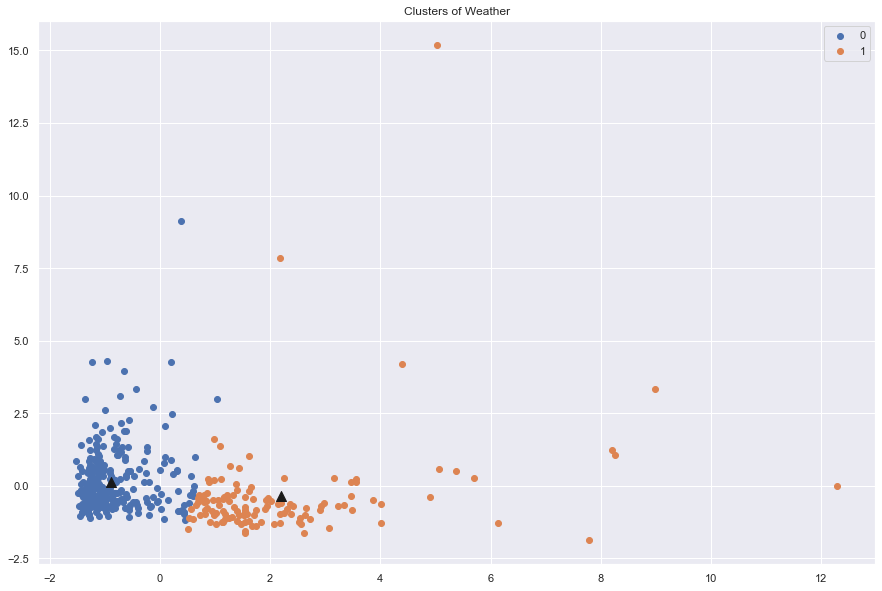

In [39]:
# get the centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

# plot the results:
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (pca_res["Cluster"] == i)
    plt.scatter(pca_res.loc[mask][0], pca_res.loc[mask][1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', marker="^")
plt.title('Clusters of Weather')
plt.legend()
plt.show()